## Neurohack - Challenge 2 London team E
### Author: Maitreyee Wairagkar
Last update: 14/01/2022

## PCA + Multiclass (5-class) SVM based Clinical Dementia Rating Prediction Model - Complete Pipeline

## 1. Load data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

'''
# Convert .dat to csv
data = pd.io.stata.read_stata('H_DAD_w1a3.dta')
data.to_csv('H_DAD_w1a3.csv')
'''

data = pd.read_csv('H_DAD_w1a3.csv')

## 2. Pre-processing by removing non-relevant features and NaN columns

In [2]:
# Features to reject
remove_features = ['prim_key','hhid','pnc','pn','r1stateid','r1iwy_d','r1iwm_d','r1lasidy','rabyear', 
                   'rabmonth', 'r1lang_d', 'r1location', 'r1mheight', 'r1mweight', 'r1ht_flag', 
                   'r1wt_flag', 'r1htlimbs', 'r1midarm', 'r1calf', 'r1kneeht', 'r1raterid1', 
                   'r1raterid2', 'r1raterid3', 'r1phase', 'r1iwstat_d', 'r1inf_age', 'r1inf_gendr', 
                   'r1inf_educ', 'r1inf_rel', 'r1inf_freq', 'r1inf_care', 'r1inf_yrs', 'r1mbmi', 'r1bmicat',] 

potential_labels = ['r1cdr_final','r1cdr_incon','r1cdr_mem1','r1cdr_ori1','r1cdr_jud1','r1cdr_com1',
                    'r1cdr_hom1','r1cdr_per1','r1cdr_scor1','r1cdr_mem2','r1cdr_ori2','r1cdr_jud2',
                    'r1cdr_com2','r1cdr_hom2','r1cdr_per2','r1cdr_scor2','r1cdr_mem3','r1cdr_ori3',
                    'r1cdr_jud3','r1cdr_com3','r1cdr_hom3','r1cdr_per3','r1cdr_scor3']


# Important features to select
features_to_select=['r1agey','ragender','raedyrs','h1rural','r1location','r1wtresp','r1obsnoise','r1obsodor',
                    'r1obsair','r1obshouse','r1borient','r1bexefu','r1blangf','r1bmemory','r1bvsp','r1nmemimm',
                    'r1nmemdel','r1nmemrec','r1nreason','r1natnspd','r1sgcp','r1hmse_scorz','r1word_totaz',
                    'r1word_dz','r1wre_scorez','r1log_recoz','r1bm_immexz','r1bm_reclexz','r1verbalz',
                    'r1csid_scorz','r1rv_scorez','r1cog_totalz','r1i_hear','r1i_sleep','r1systo','r1diasto',
                    'r1pulse','r1bphigh','r1mheight','r1mweight','r1mbmi','r1bmicat','r1adla_d','r1iadltot1_d',
                    'r1cesd10','r1anx5','r1mna_scale','r1spice','r1hear_r','r1hear_l','r1hear_aid','r1prs_toplam',
                    'r1prs_topkun','r1prs_topjan','r1prs_topcog','r1prs_pc1','r1prs_pc2','r1prs_pc3','r1prs_pc4',
                    'r1prs_pc5','r1rs7412','r1rs429358']


In [121]:
# Pre-processing: remove non-important features

# remove rows with missing values for clinician evaluation (this discards phase 1)
df = data.dropna(subset = ['r1cdr_final'])

labels = df['r1cdr_final']
gender = df['ragender']

df = df.drop(columns=potential_labels)
df = df.drop(columns=remove_features)

# remove columns with NaN
df = df.dropna(axis=1)

'''
# keep only selected features 
df = df.filter(items=features_to_select)
# Note that most of the above columns have been eliminated previously because of NaNs
df.shape
'''

df.shape

(2528, 490)

## 3.1 Data Visualisation: T-SNE Visualisation of Features

In [ ]:
# Compute and plot T-SNE
from sklearn.manifold import TSNE

# We want to get TSNE embedding with 2 dimensions
n_components = 3
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df)
tsne_result.shape

# Plot T-SNE
scatter_x = np.array(tsne_result[:,0])
scatter_y = np.array(tsne_result[:,1])
scatter_z = np.array(tsne_result[:,2])
group = np.array(labels)
cdict = {0: 'green', 0.5: 'blue', 1:'orange', 2:'red', 3: 'purple'}

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection ="3d")

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter3D(scatter_x[ix], scatter_y[ix], scatter_z[ix], c = cdict[g], label = g)
ax.legend()
plt.show()

## 3.2 Data Visualisation: Histogram of pre-processed dataset

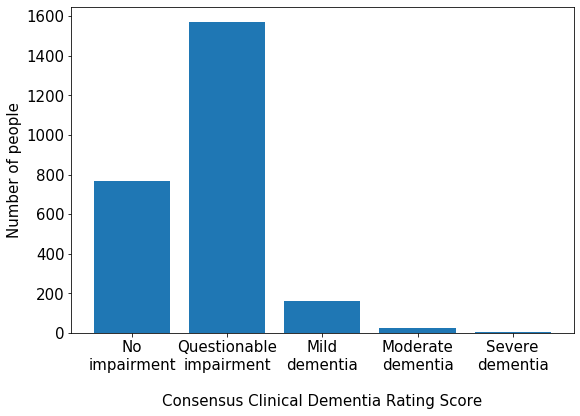

In [5]:
# Histogram
# Creating dataset
a = []
for i in labels:
    if i == 0: # no dementia
        a.append(0)
    if i == 0.5: # questionable
        a.append(1)
    if i == 1: # mild
        a.append(2)
    if i == 2: # moderate
        a.append(3)
    if i == 3: # severe
        a.append(4)

# Creating histogram
labl, counts = np.unique(a, return_counts=True)

fig = plt.figure(figsize = (9, 6))
plt.rc('font', size=15) 

plt.bar(labl, counts, align='center')
plt.gca().set_xticks(labl)
plt.gca().set_xticklabels(('No\nimpairment', 'Questionable\nimpairment', 'Mild\ndementia', 'Moderate\ndementia', 'Severe\ndementia'))
plt.xlabel('\nConsensus Clinical Dementia Rating Score')
plt.ylabel('Number of people')
plt.show()


## 3.3 Data Visualisation: PCA on cleaned data (all features)

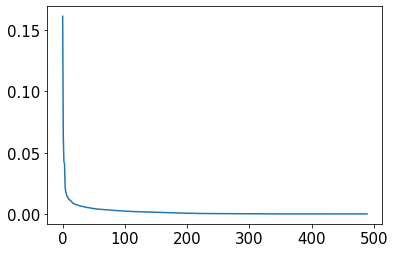

In [6]:
# standardise the data before PCA
from sklearn.preprocessing import MinMaxScaler

x = MinMaxScaler().fit_transform(df) # normalizing the features
x.shape


# PCA on all features
from sklearn.decomposition import PCA

pca = PCA() #n_components=3
principalComponents = pca.fit_transform(x)

plt.plot(pca.explained_variance_ratio_)

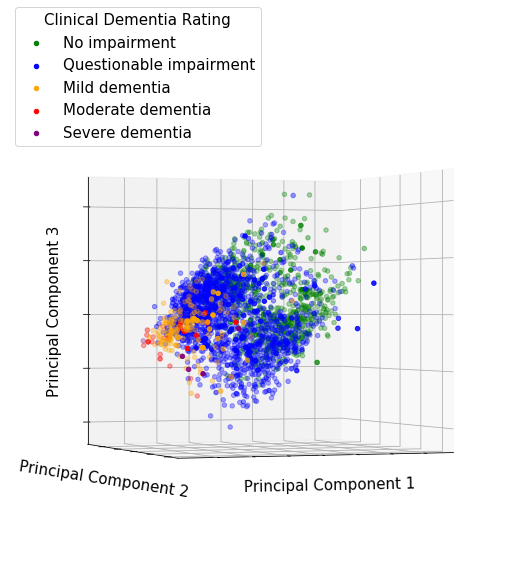

In [123]:
# plot PCA components

#%matplotlib qt

comp =[0,1,2] # select components to plot
scatter_x = np.array(principalComponents[:,comp[0]])
scatter_y = np.array(principalComponents[:,comp[1]])
scatter_z = np.array(principalComponents[:,comp[2]])
group = np.array(labels)
cdict = {0: 'green', 0.5: 'blue', 1:'orange', 2:'red', 3: 'purple'}
label_names = {0:'No impairment', 0.5:'Questionable impairment', 1:'Mild dementia', 2:'Moderate dementia', 3:'Severe dementia'}

fig = plt.figure(figsize = (9, 9))
plt.rc('font', size=15) 
ax = plt.axes(projection ="3d")


for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], scatter_z[ix], c = cdict[g], label = label_names[g] )
    
ax.legend(bbox_to_anchor=(0, 1.15),loc='upper left', title='Clinical Dementia Rating')
plt.xlabel('Principal Component '+str(comp[0]+1))
plt.ylabel('Principal Component '+str(comp[1]+1))
ax.set_zlabel('Principal Component '+str(comp[2]+1))

ax.view_init(0, 69)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
# Write PCA output in csv
pc_d=pd.DataFrame(principalComponents)
pc_d.to_csv('principalComponents.csv')

l=pd.DataFrame({'CDR_score':labels,
                    'gender': gender})
l.to_csv('data_labels.csv')

p=pd.DataFrame(pca.components_)
p.to_csv('PCAweights.csv')

v=pd.DataFrame(pca.explained_variance_ratio_)
v.to_csv('PCAvariance.csv')

col = pd.DataFrame(df.columns)
col.to_csv('PCAcolumns.csv')

# 4. Multiclass classification using PCA+SVM with 10-fold cross-validation
## 4.1 Input Data Preparation for Multiclass Classification

(7869, 491)


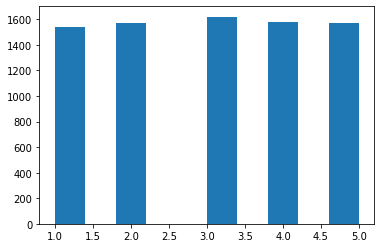

In [14]:
import numpy.matlib
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# 1. prepare data 
group = np.array(labels)

# get indices for different classes
for g in np.unique(group):
    ix = np.where(group == g)
    if g == 0:
        class_1 = ix
    if g == 0.5: 
        class_2 = ix
    if g == 1:
        class_3 = ix
    if g == 2: 
        class_4 = ix
    if g == 3:
        class_5 = ix
        
dat = df.to_numpy()
        
# Get data for each class and add class label in the last column #principalComponents
dat_1 = np.concatenate((np.squeeze(dat[class_1,:]),np.ones([len(np.squeeze(class_1)),1])),axis=1)
dat_2 = np.concatenate((np.squeeze(dat[class_2,:]),np.ones([len(np.squeeze(class_2)),1])*2),axis=1)
dat_3 = np.concatenate((np.squeeze(dat[class_3,:]),np.ones([len(np.squeeze(class_3)),1])*3),axis=1)
dat_4 = np.concatenate((np.squeeze(dat[class_4,:]),np.ones([len(np.squeeze(class_4)),1])*4),axis=1)
dat_5 = np.concatenate((np.squeeze(dat[class_5,:]),np.ones([len(np.squeeze(class_5)),1])*5),axis=1)

# up sampling: repeat matrices to match number of samples in largest class
dat1 = np.matlib.repmat(dat_1,int(np.round(dat_2.shape[0]/dat_1.shape[0])),1)
dat2 = dat_2
dat3 = np.matlib.repmat(dat_3,int(np.round(dat_2.shape[0]/dat_3.shape[0])),1)
dat4 = np.matlib.repmat(dat_4,int(np.round(dat_2.shape[0]/dat_4.shape[0])),1)
dat5 = np.matlib.repmat(dat_5,int(np.round(dat_2.shape[0]/dat_5.shape[0])),1)

# collect dat from all classes together and shuffle the order
all_dat = []
all_dat = np.concatenate((dat1,dat2,dat3,dat4,dat5),axis=0) 
np.random.shuffle(all_dat)
plt.hist(all_dat[:,-1])
print(all_dat.shape)


## 4.2. Hyperparameter tuning using Grid Search for multiclass SVM model

In [ ]:
# Hyperparameter tuning for SVM model

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [0.5, 1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [0.5, 1, 10, 100, 1000]}]

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)

X_skf = all_dat[:,0:-1] # data
Y_skf = all_dat[:,-1]   # labels

train = MinMaxScaler().fit_transform(X_skf)

svm_model.fit(train, Y_skf)

print(svm_model.best_estimator_)

## 4.3 Multiclass classification using PCA+ SVM (all features) 10-fold cross-validation

In [115]:
# Classification with SVM

# Get splits for Kfold cross-validation
kf = KFold(n_splits = 10, shuffle = True)

# Data
X_skf = all_dat[:,0:-1] # data
Y_skf = all_dat[:,-1]   # labels

# Define the models
clf = svm.SVC(kernel='rbf', C=0.5, class_weight='balanced') # C is regularisation
pca = PCA() 
lda = LinearDiscriminantAnalysis()
scaler = MinMaxScaler()

# Cross-validation and training

fold_no = 0
cnt = 0
cm =np.zeros([5,5]) # initialise empty confusion matrix
classi_report = []
train_score = []
test_score = []
loss = []
all_y_true = []
all_y_pred = []

for train_idx, test_idx in kf.split(X_skf, Y_skf): 
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no+1} for SVM ...')
    
    # 0. Scale training data
    scaler.fit(X_skf[train_idx,:])
    dat_train = scaler.transform(X_skf[train_idx,:])
    dat_test = scaler.transform(X_skf[test_idx,:])
    
    # 1. Fit PCA to to train data
    pca.fit(dat_train)
    pc_train = pca.transform(dat_train)
    pc_test = pca.transform(dat_test)
    
    # 1.1 Scale pcs
    scaler.fit(pc_train)
    pc_train = scaler.transform(pc_train)
    pc_test = scaler.transform(pc_test)
    
    '''
    # 2. Fit LDA to principal components (train data) to enhance separability of features
    lda.fit(pc_train, Y_skf[train_idx])
    ld_train = lda.transform(pc_train)
    ld_test = lda.transform(pc_test)

    # 2.2 Scale ld components
    scaler.fit(ld_train)
    ld_train = scaler.transform(ld_train)
    ld_test = scaler.transform(ld_test)
    '''
    train = pc_train
    test = pc_test
    
    # 3. Fit SVM to LDA fitted components
    clf.fit(train, Y_skf[train_idx])
    
    # 4. Make Prediction with SVM on test data
    y_pred = clf.predict(test)
    
    # 6. Evaluate the performance of SVM with Confusion Matrix and record performance
    cm = cm + confusion_matrix(Y_skf[test_idx],y_pred)
    classi_report.append(classification_report(Y_skf[test_idx],y_pred))
 
    train_score.append(clf.score(train, Y_skf[train_idx]))
    test_score.append(clf.score(test, Y_skf[test_idx]))
    loss.append(metrics.mean_squared_error(Y_skf[test_idx], y_pred))
    
    all_y_true.append(Y_skf[test_idx])
    all_y_pred.append(y_pred)
    
    print(cm)
    print('\n')
    print(classi_report[cnt])
    
    print("Training set score for SVM: %f" %train_score[cnt] )
    print("Testing  set score for SVM: %f" %test_score[cnt] )
    print("Loss per fold: %f" %loss[cnt])
    cnt=cnt+1
  
    fold_no+=1


------------------------------------------------------------------------
Training for fold 1 for SVM ...
[[146.  13.   0.   0.   0.]
 [ 16. 130.   3.   0.   0.]
 [  0.   0. 154.   0.   0.]
 [  0.   0.   0. 157.   0.]
 [  0.   0.   0.   0. 168.]]


              precision    recall  f1-score   support

         1.0       0.90      0.92      0.91       159
         2.0       0.91      0.87      0.89       149
         3.0       0.98      1.00      0.99       154
         4.0       1.00      1.00      1.00       157
         5.0       1.00      1.00      1.00       168

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787

Training set score for SVM: 0.989692
Testing  set score for SVM: 0.959339
Loss per fold: 0.040661
------------------------------------------------------------------------
Training for fold 2 for SVM ...
[[277.  25.   0.   0.   0.]
 [ 22. 254.   5.   0.   0.]
 [  

## 4.4 Print Classification Results

In [116]:
# Print results 

CM = confusion_matrix(np.hstack(all_y_true),np.hstack(all_y_pred),normalize='true')*100
CM = np.round(CM,2)
print("Confusion matrix for multiclass classifier (%):\n")
print("                No dementia  "+ 'Questionable  '+ 'Mild   '+ 'Moderate  '+ 'Severe  ')
print("No dementia     "+ str(CM[0,0]) + "        " + str(CM[0,1])+ "          " + str(CM[0,2])+ "    " + str(CM[0,3])+ "       " + str(CM[0,4]))
print("Questionable    "+ str(CM[1,0]) + "        " + str(CM[1,1])+ "         " + str(CM[1,2])+ "    " + str(CM[1,3])+ "       " + str(CM[1,4]))
print("Mild            "+ str(CM[2,0]) + "          " + str(CM[2,1])+ "          " + str(CM[2,2])+ "  " + str(CM[2,3])+ "       " + str(CM[2,4]))
print("Moderate        "+ str(CM[3,0]) + "          " + str(CM[3,1])+ "           " + str(CM[3,2])+ "    " + str(CM[3,3])+ "     " + str(CM[3,4]))
print("Severe.         "+ str(CM[4,0]) + "          " + str(CM[4,1])+ "           " + str(CM[4,2])+ "    " + str(CM[4,3])+ "       " + str(CM[4,4]))

print('--------------------------------------------------------------------')
print()
print('Model Performance: ')
print()
report = classification_report(np.hstack(all_y_true),np.hstack(all_y_pred), output_dict=True)
print("Class                       Precision       Recall      f1-score")
print("No dementia                 "+ str(np.round(report['1.0']['precision']*100,2))+"           "+
                                      str(np.round(report['1.0']['recall']*100,2)) +"       "+
                                      str(np.round(report['1.0']['f1-score']*100,2)))
print("Questionable impairment     "+ str(np.round(report['2.0']['precision']*100,2))+"           "+
                                      str(np.round(report['2.0']['recall']*100,2)) +"       "+
                                      str(np.round(report['2.0']['f1-score']*100,2)))
print("Mild dementia               "+ str(np.round(report['3.0']['precision']*100,2))+"           "+
                                      str(np.round(report['3.0']['recall']*100,2)) +"       "+
                                      str(np.round(report['3.0']['f1-score']*100,2)))
print("Moderate dementia           "+ str(np.round(report['4.0']['precision']*100,2))+"           "+
                                      str(np.round(report['4.0']['recall']*100,2)) +"       "+
                                      str(np.round(report['4.0']['f1-score']*100,2)))
print("Severe dementia             "+ str(np.round(report['5.0']['precision']*100,2))+"           "+
                                      str(np.round(report['5.0']['recall']*100,2)) +"       "+
                                      str(np.round(report['5.0']['f1-score']*100,2)))
print()
print("Accuracy on test data: %0.2f" %np.round(np.mean(test_score)*100,2)+'%')
print("Accuracy on training data: %0.2f" %np.round(np.mean(train_score)*100,2)+'%')
print()
print("MSE Loss: %0.3f" %np.mean(loss))



Confusion matrix for multiclass classifier (%):

                No dementia  Questionable  Mild   Moderate  Severe  
No dementia     89.32        10.68          0.0    0.0       0.0
Questionable    10.2        88.78         1.02    0.0       0.0
Mild            0.0          0.0          100.0  0.0       0.0
Moderate        0.0          0.0           0.0    100.0     0.0
Severe.         0.0          0.0           0.0    0.0       100.0
--------------------------------------------------------------------

Model Performance: 

Class                       Precision       Recall      f1-score
No dementia                 89.56           89.32       89.44
Questionable impairment     89.46           88.78       89.12
Mild dementia               99.02           100.0       99.51
Moderate dementia           100.0           100.0       100.0
Severe dementia             100.0           100.0       100.0

Accuracy on test data: 95.68%
Accuracy on training data: 98.76%

MSE Loss: 0.043


## 4.5 Plot prediction results and Model performance

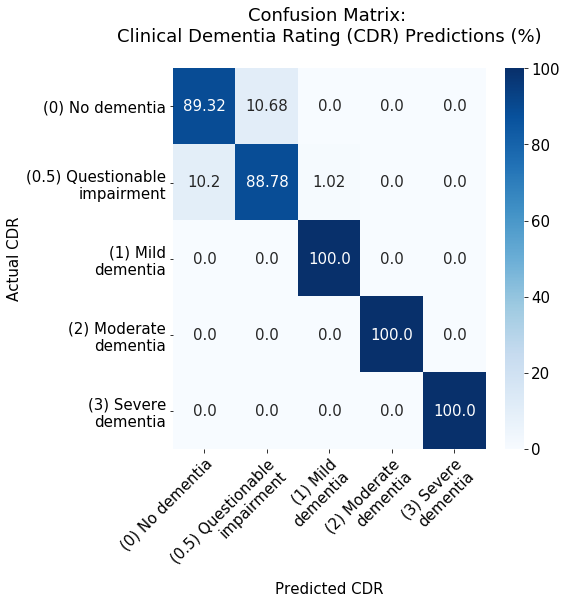

In [117]:
# Plot confusion matrix

import seaborn as sns

fig = plt.figure(figsize = (7, 7))
plt.rc('font', size=15) 
ax = plt.axes()
ax = sns.heatmap(CM, annot=True,  fmt='', cmap='Blues')

ax.set_title('Confusion Matrix: \nClinical Dementia Rating (CDR) Predictions (%)\n');
ax.set_xlabel('Predicted CDR')
ax.set_ylabel('Actual CDR');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['(0) No dementia' , '(0.5) Questionable\nimpairment', '(1) Mild\ndementia', '(2) Moderate\ndementia' , '(3) Severe\ndementia'])
ax.yaxis.set_ticklabels(['(0) No dementia' , '(0.5) Questionable\nimpairment', '(1) Mild\ndementia', '(2) Moderate\ndementia' , '(3) Severe\ndementia'])

plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")


## Display the visualization of the Confusion Matrix.
plt.show()

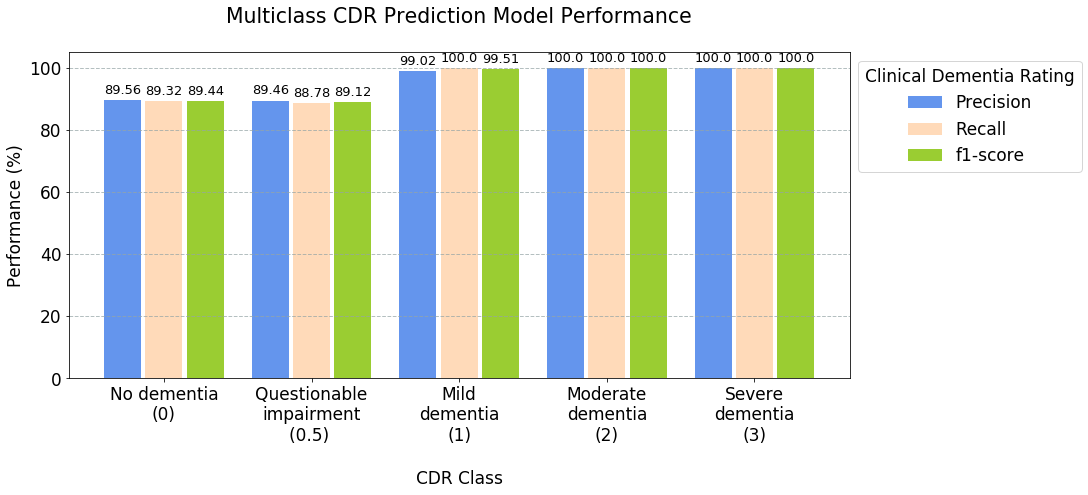

In [118]:
# Plot Model Performance
precision_bar = [np.round(report['1.0']['precision']*100,2), np.round(report['2.0']['precision']*100,2),
                 np.round(report['3.0']['precision']*100,2), np.round(report['4.0']['precision']*100,2), 
                 np.round(report['5.0']['precision']*100,2)]

recall_bar =  [np.round(report['1.0']['recall']*100,2), np.round(report['2.0']['recall']*100,2),
               np.round(report['3.0']['recall']*100,2), np.round(report['4.0']['recall']*100,2), 
               np.round(report['5.0']['recall']*100,2)]

f1_bar =  [np.round(report['1.0']['f1-score']*100,2), np.round(report['2.0']['f1-score']*100,2),
               np.round(report['3.0']['f1-score']*100,2), np.round(report['4.0']['f1-score']*100,2), 
               np.round(report['5.0']['f1-score']*100,2)]

labels = ['No dementia\n(0)' , 'Questionable\nimpairment\n(0.5) ', 'Mild\ndementia\n(1)', 'Moderate\ndementia\n(2)' , 'Severe\ndementia\n(3)']

width =0.25


fig = plt.figure(figsize = (14, 6))
plt.rc('font', size=17) 
ax = plt.axes()

plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
b1 = plt.bar(np.arange(len(precision_bar))-width-0.03, precision_bar, width=width,color='cornflowerblue', label='Precision')
b2 = plt.bar(np.arange(len(recall_bar)), recall_bar, width=width, color='peachpuff', label='Recall')
b3 = plt.bar(np.arange(len(f1_bar))+ width+0.03, f1_bar, width=width, color='yellowgreen', label='f1-score')

for bar in b1:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 2, yval, fontsize=13)
    
for bar in b2:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 2, yval, fontsize=13)
    
for bar in b3:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 2, yval, fontsize=13)
    
plt.xticks(range(len(f1_bar)), labels)
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

plt.xlabel('\nCDR Class')
plt.ylabel('Performance (%)')
plt.title('Multiclass CDR Prediction Model Performance\n')

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', title='Clinical Dementia Rating')


plt.show()